In [0]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
inFile = 'full'
images = np.load('drive/My Drive/' + inFile + '_images.npy', mmap_mode='r')
labels = np.load('drive/My Drive/' + inFile + '_labels.npy', mmap_mode='r')

In [0]:
# Model 1
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model = models.Sequential()
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=2, activation='relu', input_shape=(512, 512, 1)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(filters=2*512, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(4*512, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 255, 255, 512)     5120      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 85, 85, 512)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 83, 83, 1024)      4719616   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 27, 27, 1024)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 25, 25, 2048)      18876416  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])


history = model.fit(X_train, y_train, epochs=200,batch_size=8,
                    validation_data=(X_test, y_test))

Epoch 1/200
80/80 [==============================] - 17s 214ms/step - loss: 0.7426 - accuracy: 0.4906 - auc_4: 0.4639 - val_loss: 0.6930 - val_accuracy: 0.5625 - val_auc_4: 0.5000
Epoch 2/200
80/80 [==============================] - 17s 211ms/step - loss: 0.6932 - accuracy: 0.4875 - auc_4: 0.5137 - val_loss: 0.6910 - val_accuracy: 0.5938 - val_auc_4: 0.5954
Epoch 3/200
80/80 [==============================] - 17s 212ms/step - loss: 0.6964 - accuracy: 0.5141 - auc_4: 0.5021 - val_loss: 0.6918 - val_accuracy: 0.6125 - val_auc_4: 0.6547
Epoch 4/200
80/80 [==============================] - 17s 211ms/step - loss: 0.6893 - accuracy: 0.5813 - auc_4: 0.5746 - val_loss: 0.6845 - val_accuracy: 0.5938 - val_auc_4: 0.6028
Epoch 5/200
80/80 [==============================] - 17s 211ms/step - loss: 0.6803 - accuracy: 0.6234 - auc_4: 0.6176 - val_loss: 0.6716 - val_accuracy: 0.5250 - val_auc_4: 0.6204
Epoch 6/200
80/80 [==============================] - 17s 211ms/step - loss: 0.6779 - accuracy: 0.582

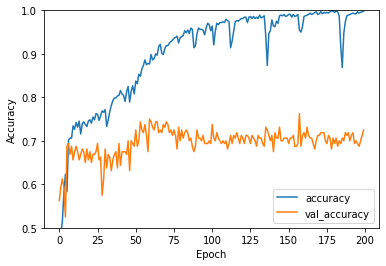

RuntimeError: ignored

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [0]:
# Model 2
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model = models.Sequential()
model.add(layers.Conv2D(filters=512, kernel_size=(5, 5), strides=2, activation='relu', input_shape=(512, 512, 1)))
model.add(layers.MaxPooling2D((5, 5)))
model.add(layers.Conv2D(filters=2*512, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(4*512, (3, 3), activation='relu'))
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 254, 254, 512)     13312     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 50, 50, 512)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 48, 48, 1024)      4719616   
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 1024)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 2048)      18876416  
_________________________________________________________________
global_max_pooling2d_4 (Glob (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)              

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])


history = model.fit(X_train, y_train, epochs=200,batch_size=8,
                    validation_data=(X_test, y_test))

Epoch 1/200
80/80 [==============================] - 9s 111ms/step - loss: 0.7592 - accuracy: 0.5859 - auc_8: 0.6208 - val_loss: 0.6123 - val_accuracy: 0.7500 - val_auc_8: 0.7322
Epoch 2/200
80/80 [==============================] - 9s 108ms/step - loss: 0.6010 - accuracy: 0.6875 - auc_8: 0.7354 - val_loss: 0.5876 - val_accuracy: 0.7063 - val_auc_8: 0.7925
Epoch 3/200
80/80 [==============================] - 9s 109ms/step - loss: 0.5773 - accuracy: 0.7125 - auc_8: 0.7630 - val_loss: 0.6262 - val_accuracy: 0.7500 - val_auc_8: 0.7939
Epoch 4/200
80/80 [==============================] - 9s 109ms/step - loss: 0.5382 - accuracy: 0.7250 - auc_8: 0.8011 - val_loss: 0.5512 - val_accuracy: 0.7125 - val_auc_8: 0.8206
Epoch 5/200
80/80 [==============================] - 9s 109ms/step - loss: 0.4901 - accuracy: 0.7641 - auc_8: 0.8413 - val_loss: 0.5989 - val_accuracy: 0.7563 - val_auc_8: 0.8312
Epoch 6/200
80/80 [==============================] - 9s 109ms/step - loss: 0.4857 - accuracy: 0.7688 - au

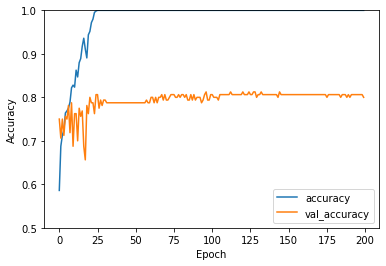

5/5 - 0s - loss: 0.6220 - accuracy: 0.6500 - auc_10: 0.7341
0.7341363430023193


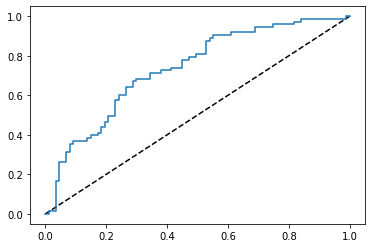

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [0]:
# Model 3
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model = models.Sequential()
model.add(layers.Conv2D(filters=512, kernel_size=(5, 5), strides=2, activation='relu', input_shape=(512, 512, 1)))
model.add(layers.MaxPooling2D((5, 5)))
model.add(layers.Conv2D(filters=2*512, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(4*512, (3, 3), activation='relu'))
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dropout(.5))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 254, 254, 512)     13312     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 50, 50, 512)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 48, 48, 1024)      4719616   
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 1024)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 2048)      18876416  
_________________________________________________________________
global_max_pooling2d_8 (Glob (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)            

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])


history = model.fit(X_train, y_train, epochs=150, batch_size=8,
                    validation_data=(X_test, y_test))

Epoch 1/150
80/80 [==============================] - 9s 111ms/step - loss: 0.7150 - accuracy: 0.6031 - auc_13: 0.6345 - val_loss: 0.6160 - val_accuracy: 0.6187 - val_auc_13: 0.7840
Epoch 2/150
80/80 [==============================] - 9s 109ms/step - loss: 0.5865 - accuracy: 0.7094 - auc_13: 0.7618 - val_loss: 0.5799 - val_accuracy: 0.6875 - val_auc_13: 0.7993
Epoch 3/150
80/80 [==============================] - 9s 108ms/step - loss: 0.5471 - accuracy: 0.7281 - auc_13: 0.7973 - val_loss: 0.5711 - val_accuracy: 0.6875 - val_auc_13: 0.7872
Epoch 4/150
80/80 [==============================] - 9s 109ms/step - loss: 0.5209 - accuracy: 0.7594 - auc_13: 0.8246 - val_loss: 0.5682 - val_accuracy: 0.7000 - val_auc_13: 0.8074
Epoch 5/150
80/80 [==============================] - 9s 109ms/step - loss: 0.5397 - accuracy: 0.7328 - auc_13: 0.8062 - val_loss: 0.5374 - val_accuracy: 0.7312 - val_auc_13: 0.8122
Epoch 6/150
80/80 [==============================] - 9s 109ms/step - loss: 0.5065 - accuracy: 0

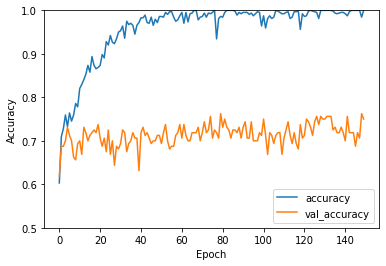

5/5 - 0s - loss: 2.3159 - accuracy: 0.7500 - auc_13: 0.7687
0.7687138319015503


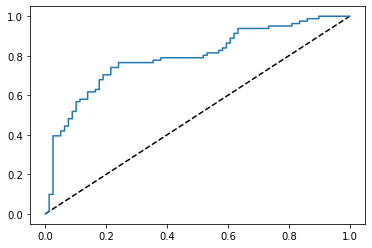

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [0]:
# Model 4
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model = models.Sequential()
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=1, activation='relu', input_shape=(512, 512, 1)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(filters=2*512, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 510, 510, 512)     5120      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 170, 170, 512)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 168, 168, 1024)    4719616   
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1025000   
_________________________________________________________________
dense_5 (Dense)              (None, 300)               300300    
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])

history = model.fit(X_train, y_train, epochs=200, batch_size=8,
                    validation_data=(X_test, y_test))

Epoch 1/200
80/80 [==============================] - 49s 607ms/step - loss: 0.6860 - accuracy: 0.6031 - auc_1: 0.6499 - val_loss: 0.6645 - val_accuracy: 0.5625 - val_auc_1: 0.8242
Epoch 2/200
80/80 [==============================] - 48s 597ms/step - loss: 0.5918 - accuracy: 0.7203 - auc_1: 0.7625 - val_loss: 0.6003 - val_accuracy: 0.7188 - val_auc_1: 0.8222
Epoch 3/200
80/80 [==============================] - 48s 599ms/step - loss: 0.5689 - accuracy: 0.7437 - auc_1: 0.7763 - val_loss: 0.5823 - val_accuracy: 0.7250 - val_auc_1: 0.8284
Epoch 4/200
80/80 [==============================] - 48s 597ms/step - loss: 0.5595 - accuracy: 0.7547 - auc_1: 0.7891 - val_loss: 0.6100 - val_accuracy: 0.7125 - val_auc_1: 0.8407
Epoch 5/200
80/80 [==============================] - 48s 596ms/step - loss: 0.5114 - accuracy: 0.7781 - auc_1: 0.8221 - val_loss: 0.5234 - val_accuracy: 0.7375 - val_auc_1: 0.8267
Epoch 6/200
80/80 [==============================] - 48s 596ms/step - loss: 0.5008 - accuracy: 0.778

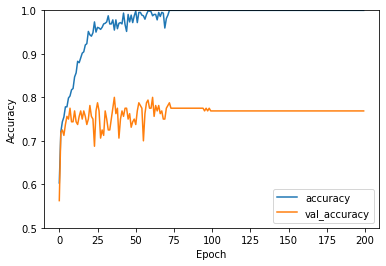

ResourceExhaustedError: ignored

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [0]:
# Model 5
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model = models.Sequential()
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=2, activation='relu', input_shape=(512, 512, 1)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(filters=2*512, kernel_size=(3, 3), strides=2, activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(4*512, (3, 3), activation='relu'))
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 255, 255, 512)     5120      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 85, 85, 512)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 42, 42, 1024)      4719616   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 1024)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 2048)      18876416  
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)             

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])

history = model.fit(X_train, y_train, epochs=200, batch_size=8,
                    validation_data=(X_test, y_test))

Epoch 1/200
80/80 [==============================] - 11s 138ms/step - loss: 0.6656 - accuracy: 0.6313 - auc_2: 0.6603 - val_loss: 0.5638 - val_accuracy: 0.7250 - val_auc_2: 0.7821
Epoch 2/200
80/80 [==============================] - 11s 134ms/step - loss: 0.6214 - accuracy: 0.7063 - auc_2: 0.7174 - val_loss: 0.6012 - val_accuracy: 0.7188 - val_auc_2: 0.7537
Epoch 3/200
80/80 [==============================] - 11s 134ms/step - loss: 0.5862 - accuracy: 0.7000 - auc_2: 0.7559 - val_loss: 0.5469 - val_accuracy: 0.7312 - val_auc_2: 0.8145
Epoch 4/200
80/80 [==============================] - 11s 133ms/step - loss: 0.5253 - accuracy: 0.7516 - auc_2: 0.8191 - val_loss: 0.5463 - val_accuracy: 0.7312 - val_auc_2: 0.8110
Epoch 5/200
80/80 [==============================] - 11s 133ms/step - loss: 0.4979 - accuracy: 0.7719 - auc_2: 0.8401 - val_loss: 0.5554 - val_accuracy: 0.7750 - val_auc_2: 0.8416
Epoch 6/200
80/80 [==============================] - 11s 134ms/step - loss: 0.5413 - accuracy: 0.725

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [0]:
# Model 6
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

def one_hot(x):
  temp = [0,0]
  temp[x] = 1
  return temp

y_train = np.array([one_hot(x) for x in y_train]) 
y_test = np.array([one_hot(x) for x in y_test])

model = models.Sequential()
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=2, activation='relu', input_shape=(512, 512, 1)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(filters=2*512, kernel_size=(3, 3), strides=2, activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(4*512, (3, 3), activation='relu'))
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 255, 255, 512)     5120      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 85, 85, 512)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 42, 42, 1024)      4719616   
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 1024)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 2048)      18876416  
_________________________________________________________________
global_max_pooling2d_7 (Glob (None, 2048)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 1000)             

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])

history = model.fit(X_train, y_train, epochs=120, batch_size=2,
                    validation_data=(X_test, y_test))

Epoch 1/120
80/80 [==============================] - 11s 136ms/step - loss: 0.6983 - accuracy: 0.6109 - auc_2: 0.6364 - val_loss: 0.6001 - val_accuracy: 0.6938 - val_auc_2: 0.7460
Epoch 2/120
80/80 [==============================] - 11s 132ms/step - loss: 0.5914 - accuracy: 0.7250 - auc_2: 0.7606 - val_loss: 0.6161 - val_accuracy: 0.7125 - val_auc_2: 0.7383
Epoch 3/120
80/80 [==============================] - 11s 132ms/step - loss: 0.5854 - accuracy: 0.7141 - auc_2: 0.7638 - val_loss: 0.5891 - val_accuracy: 0.6875 - val_auc_2: 0.7611
Epoch 4/120
80/80 [==============================] - 11s 132ms/step - loss: 0.5472 - accuracy: 0.7297 - auc_2: 0.7936 - val_loss: 0.6274 - val_accuracy: 0.7125 - val_auc_2: 0.7329
Epoch 5/120
80/80 [==============================] - 11s 132ms/step - loss: 0.4970 - accuracy: 0.7641 - auc_2: 0.8385 - val_loss: 0.6345 - val_accuracy: 0.7063 - val_auc_2: 0.7737
Epoch 6/120
80/80 [==============================] - 11s 132ms/step - loss: 0.4686 - accuracy: 0.789

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

NameError: ignored

In [0]:
# Model 7
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model = models.Sequential()
model.add(layers.Conv2D(filters=512, kernel_size=(5, 5), strides=2, activation='relu', input_shape=(512, 512, 1)))
model.add(layers.MaxPooling2D((5, 5)))
model.add(layers.Conv2D(filters=2*512, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(4*512, (3, 3), activation='relu'))
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 512)     13312     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 50, 50, 512)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 1024)      4719616   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 1024)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 2048)      18876416  
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])

history = model.fit(X_train, y_train, epochs=200, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/200
20/20 [==============================] - 12s 592ms/step - loss: 0.9512 - accuracy: 0.5141 - auc_3: 0.5459 - val_loss: 0.6819 - val_accuracy: 0.4875 - val_auc_3: 0.7337
Epoch 2/200
20/20 [==============================] - 12s 581ms/step - loss: 0.6073 - accuracy: 0.7094 - auc_3: 0.7426 - val_loss: 0.6345 - val_accuracy: 0.7188 - val_auc_3: 0.8013
Epoch 3/200
20/20 [==============================] - 12s 584ms/step - loss: 0.5512 - accuracy: 0.7250 - auc_3: 0.7887 - val_loss: 0.5501 - val_accuracy: 0.7437 - val_auc_3: 0.8197
Epoch 4/200
20/20 [==============================] - 12s 586ms/step - loss: 0.5200 - accuracy: 0.7266 - auc_3: 0.8184 - val_loss: 0.7760 - val_accuracy: 0.6812 - val_auc_3: 0.8271
Epoch 5/200
20/20 [==============================] - 12s 586ms/step - loss: 0.4939 - accuracy: 0.7531 - auc_3: 0.8401 - val_loss: 0.5831 - val_accuracy: 0.7875 - val_auc_3: 0.8523
Epoch 6/200
20/20 [==============================] - 12s 588ms/step - loss: 0.4509 - accuracy: 0.768

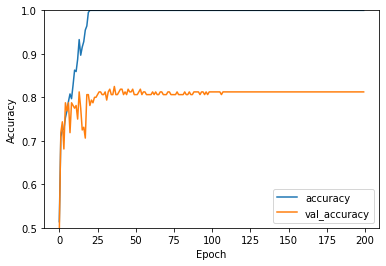

5/5 - 1s - loss: 2.4446 - accuracy: 0.8125 - auc_3: 0.8660
0.8660389184951782


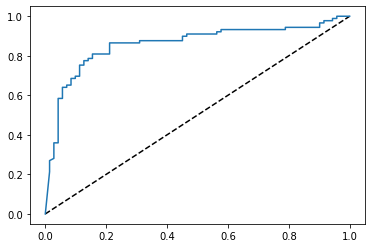

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [0]:
# Model 8
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model = models.Sequential()
model.add(layers.Conv2D(filters=512, kernel_size=(8, 8), strides=4, activation='relu', input_shape=(512, 512, 1)))
model.add(layers.MaxPooling2D((8, 8)))
model.add(layers.Conv2D(filters=2*512, kernel_size=(4, 4), strides=1, activation='relu'))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Conv2D(4*512, (2, 2), activation='relu'))
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 512)     33280     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 512)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 1024)      8389632   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 1024)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 2048)        8390656   
_________________________________________________________________
global_max_pooling2d (Global (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               2

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])

history = model.fit(X_train, y_train, epochs=200, batch_size=8,
                    validation_data=(X_test, y_test))

Epoch 1/200
80/80 [==============================] - 7s 92ms/step - loss: 0.7056 - accuracy: 0.5875 - auc: 0.6042 - val_loss: 0.6209 - val_accuracy: 0.7188 - val_auc: 0.7932
Epoch 2/200
80/80 [==============================] - 7s 88ms/step - loss: 0.6362 - accuracy: 0.6594 - auc: 0.6977 - val_loss: 0.5261 - val_accuracy: 0.7437 - val_auc: 0.8065
Epoch 3/200
80/80 [==============================] - 7s 88ms/step - loss: 0.5640 - accuracy: 0.7109 - auc: 0.7779 - val_loss: 0.4696 - val_accuracy: 0.7625 - val_auc: 0.8560
Epoch 4/200
80/80 [==============================] - 7s 88ms/step - loss: 0.5887 - accuracy: 0.7172 - auc: 0.7590 - val_loss: 0.5481 - val_accuracy: 0.7375 - val_auc: 0.8226
Epoch 5/200
80/80 [==============================] - 7s 88ms/step - loss: 0.5396 - accuracy: 0.7453 - auc: 0.7976 - val_loss: 0.4804 - val_accuracy: 0.7437 - val_auc: 0.8391
Epoch 6/200
80/80 [==============================] - 7s 88ms/step - loss: 0.5024 - accuracy: 0.7703 - auc: 0.8276 - val_loss: 0.47

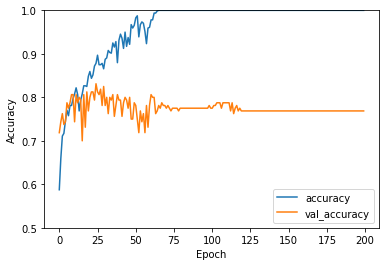

5/5 - 0s - loss: 3.1104 - accuracy: 0.7688 - auc: 0.8019
0.8019267320632935


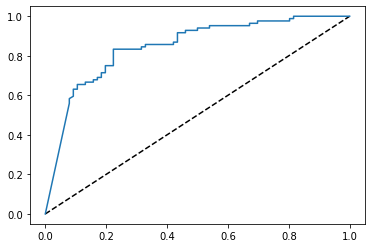

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [0]:
# Model 9
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model = models.Sequential()
model.add(layers.Conv2D(filters=200, kernel_size=(3, 3), strides=2, activation='relu', input_shape=(512, 512, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=200, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides = 2))
model.add(layers.Conv2D(filters=100, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=100, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=100, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3, 3), strides = 2))
model.add(layers.Conv2D(filters=100, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3, 3), strides = 2))
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 255, 255, 200)     2000      
_________________________________________________________________
batch_normalization_1 (Batch (None, 255, 255, 200)     800       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 253, 253, 200)     360200    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 126, 126, 200)     0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 124, 124, 100)     180100    
_________________________________________________________________
batch_normalization_2 (Batch (None, 124, 124, 100)     400       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 122, 122, 100)    

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/100
20/20 [==============================] - 16s 791ms/step - loss: 0.9892 - accuracy: 0.6500 - auc_1: 0.6701 - val_loss: 1.1697 - val_accuracy: 0.5063 - val_auc_1: 0.6206
Epoch 2/100
20/20 [==============================] - 14s 716ms/step - loss: 0.5271 - accuracy: 0.7406 - auc_1: 0.8151 - val_loss: 0.6778 - val_accuracy: 0.5688 - val_auc_1: 0.6732
Epoch 3/100
20/20 [==============================] - 14s 718ms/step - loss: 0.5034 - accuracy: 0.7437 - auc_1: 0.8309 - val_loss: 0.6930 - val_accuracy: 0.5063 - val_auc_1: 0.6381
Epoch 4/100
20/20 [==============================] - 14s 718ms/step - loss: 0.5049 - accuracy: 0.7516 - auc_1: 0.8329 - val_loss: 0.7502 - val_accuracy: 0.5063 - val_auc_1: 0.5571
Epoch 5/100
20/20 [==============================] - 14s 717ms/step - loss: 0.5204 - accuracy: 0.7484 - auc_1: 0.8196 - val_loss: 0.7091 - val_accuracy: 0.5063 - val_auc_1: 0.5854
Epoch 6/100
20/20 [==============================] - 14s 716ms/step - loss: 0.4984 - accuracy: 0.750

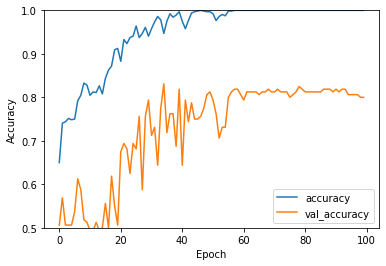

5/5 - 1s - loss: 1.3150 - accuracy: 0.8000 - auc_1: 0.8496
0.8495858311653137


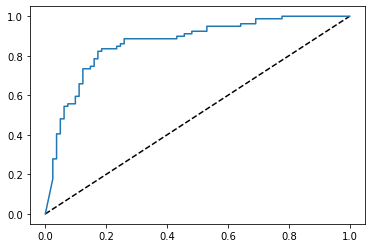

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [0]:
# Model 10 Winning Model

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model = models.Sequential()
model.add(layers.Conv2D(filters=200, kernel_size=(3, 3), strides=2, activation='relu', input_shape=(512, 512, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=200, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides = 2))
model.add(layers.Conv2D(filters=100, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=100, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=100, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3, 3), strides = 2))
model.add(layers.Conv2D(filters=100, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3, 3), strides = 2))
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 255, 255, 200)     2000      
_________________________________________________________________
batch_normalization_11 (Batc (None, 255, 255, 200)     800       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 253, 253, 200)     360200    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 126, 126, 200)     0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 124, 124, 100)     180100    
_________________________________________________________________
batch_normalization_12 (Batc (None, 124, 124, 100)     400       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 122, 122, 100)    

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])

history = model.fit(X_train, y_train, epochs=120, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/120
20/20 [==============================] - 15s 732ms/step - loss: 1.0157 - accuracy: 0.5953 - auc_3: 0.6063 - val_loss: 0.6983 - val_accuracy: 0.4938 - val_auc_3: 0.7225
Epoch 2/120
20/20 [==============================] - 14s 717ms/step - loss: 0.6288 - accuracy: 0.6531 - auc_3: 0.7073 - val_loss: 0.6847 - val_accuracy: 0.6313 - val_auc_3: 0.6844
Epoch 3/120
20/20 [==============================] - 14s 717ms/step - loss: 0.5977 - accuracy: 0.6719 - auc_3: 0.7420 - val_loss: 0.6924 - val_accuracy: 0.5250 - val_auc_3: 0.6208
Epoch 4/120
20/20 [==============================] - 14s 717ms/step - loss: 0.5576 - accuracy: 0.7203 - auc_3: 0.7889 - val_loss: 0.6984 - val_accuracy: 0.5312 - val_auc_3: 0.5341
Epoch 5/120
20/20 [==============================] - 14s 718ms/step - loss: 0.6030 - accuracy: 0.6844 - auc_3: 0.7460 - val_loss: 0.6952 - val_accuracy: 0.5250 - val_auc_3: 0.5297
Epoch 6/120
20/20 [==============================] - 14s 717ms/step - loss: 0.5223 - accuracy: 0.743

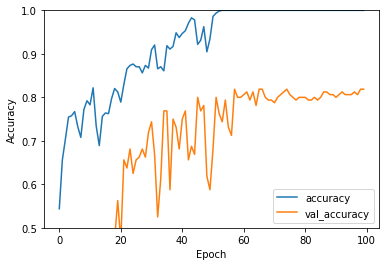

NameError: ignored

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [0]:
# Model 11
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model2 = models.Sequential()
model2.add(layers.Conv2D(filters=200, kernel_size=(3, 3), strides=2, activation='relu', input_shape=(512, 512, 1)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(filters=200, kernel_size=(3, 3), strides=1, activation='relu'))
model2.add(layers.MaxPooling2D((3, 3), strides = 2))
model2.add(layers.Conv2D(filters=100, kernel_size=(3, 3), strides=1, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(filters=100, kernel_size=(3, 3), strides=1, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(filters=100, kernel_size=(3, 3), strides=1, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((3, 3), strides = 2))
model2.add(layers.Conv2D(filters=100, kernel_size=(3, 3), strides=1, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((3, 3), strides = 2))
model2.add(layers.GlobalMaxPooling2D())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

print(model2.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 255, 255, 200)     2000      
_________________________________________________________________
batch_normalization_51 (Batc (None, 255, 255, 200)     800       
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 253, 253, 200)     360200    
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 126, 126, 200)     0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 124, 124, 100)     180100    
_________________________________________________________________
batch_normalization_52 (Batc (None, 124, 124, 100)     400       
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 122, 122, 100)   

In [0]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])

history = model2.fit(X_train, y_train, epochs=300, batch_size=4,
                    validation_data=(X_test, y_test))

Epoch 1/300
160/160 [==============================] - 16s 99ms/step - loss: 0.7397 - accuracy: 0.5938 - auc_6: 0.6303 - val_loss: 0.6795 - val_accuracy: 0.5625 - val_auc_6: 0.6592
Epoch 2/300
160/160 [==============================] - 15s 97ms/step - loss: 0.6390 - accuracy: 0.6594 - auc_6: 0.7068 - val_loss: 0.7177 - val_accuracy: 0.4437 - val_auc_6: 0.7042
Epoch 3/300
160/160 [==============================] - 15s 96ms/step - loss: 0.5987 - accuracy: 0.6906 - auc_6: 0.7487 - val_loss: 0.9252 - val_accuracy: 0.4437 - val_auc_6: 0.7869
Epoch 4/300
160/160 [==============================] - 15s 97ms/step - loss: 0.5885 - accuracy: 0.6812 - auc_6: 0.7523 - val_loss: 0.5466 - val_accuracy: 0.7000 - val_auc_6: 0.8008
Epoch 5/300
160/160 [==============================] - 16s 97ms/step - loss: 0.5581 - accuracy: 0.7250 - auc_6: 0.7882 - val_loss: 0.5256 - val_accuracy: 0.7375 - val_auc_6: 0.8118
Epoch 6/300
160/160 [==============================] - 16s 97ms/step - loss: 0.5750 - accuracy:

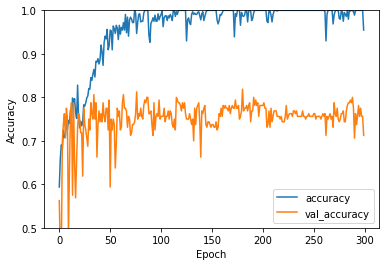

5/5 - 1s - loss: 1.6394 - accuracy: 0.7125 - auc_6: 0.8116
0.811599850654602


In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model2.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

In [0]:
# Model 16 (Models 12 - 15 in DropoutStuff.ipynb)
from keras.layers import  Dropout
from keras import regularizers
from keras.regularizers import l2,l1

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model2 = models.Sequential()
model2.add(layers.Conv2D(filters=200, kernel_size=(3, 3), strides=2, activation='relu', input_shape=(512, 512, 1)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(filters=200, kernel_size=(3, 3), strides=1, activation='relu'))
model2.add(layers.MaxPooling2D((3, 3), strides = 2))
model2.add(layers.Conv2D(filters=100, kernel_size=(3, 3), strides=1, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(filters=100, kernel_size=(3, 3), strides=1, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(filters=100, kernel_size=(3, 3), strides=1, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((3, 3), strides = 2))
model2.add(layers.Conv2D(filters=100, kernel_size=(3, 3), strides=1, activation='relu', kernel_regularizer=l1(0.00001)))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((3, 3), strides = 2))
model2.add(layers.GlobalMaxPooling2D())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 255, 255, 200)     2000      
_________________________________________________________________
batch_normalization_15 (Batc (None, 255, 255, 200)     800       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 253, 253, 200)     360200    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 126, 126, 200)     0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 124, 124, 100)     180100    
_________________________________________________________________
batch_normalization_16 (Batc (None, 124, 124, 100)     400       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 122, 122, 100)    

In [0]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])

history = model2.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/100
20/20 [==============================] - 15s 727ms/step - loss: 1.2083 - accuracy: 0.5437 - auc_5: 0.5621 - val_loss: 0.7419 - val_accuracy: 0.4938 - val_auc_5: 0.6692
Epoch 2/100
20/20 [==============================] - 14s 715ms/step - loss: 0.6554 - accuracy: 0.6562 - auc_5: 0.7128 - val_loss: 0.7880 - val_accuracy: 0.4938 - val_auc_5: 0.6474
Epoch 3/100
20/20 [==============================] - 14s 715ms/step - loss: 0.6080 - accuracy: 0.7047 - auc_5: 0.7643 - val_loss: 0.7389 - val_accuracy: 0.4938 - val_auc_5: 0.6070
Epoch 4/100
20/20 [==============================] - 14s 714ms/step - loss: 0.5563 - accuracy: 0.7547 - auc_5: 0.8154 - val_loss: 0.7381 - val_accuracy: 0.4938 - val_auc_5: 0.4508
Epoch 5/100
20/20 [==============================] - 14s 714ms/step - loss: 0.5545 - accuracy: 0.7578 - auc_5: 0.8138 - val_loss: 0.7820 - val_accuracy: 0.4938 - val_auc_5: 0.4544
Epoch 6/100
20/20 [==============================] - 14s 714ms/step - loss: 0.5187 - accuracy: 0.767

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model2.evaluate(X_test,  y_test, verbose=2)

print(test_acc)